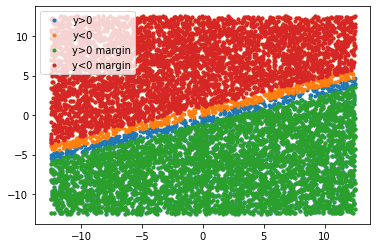

pre and post train accuracies: 51.200 and 2.400


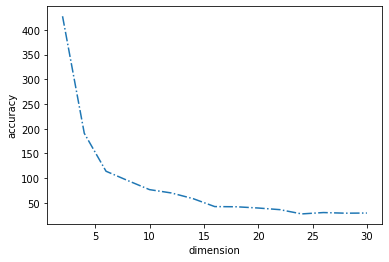

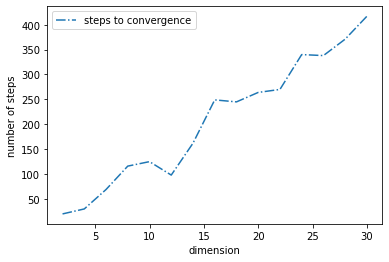

In [9]:
import numpy as np 
from numpy import linalg as la
import matplotlib.pyplot as plt 



class DataGen:
    def __init__(self,dim = 10):
        w = np.random.random(dim) - .5 
        w /= la.norm(w)
        self.dim = dim 
        self.w = w 
    
    def gen_data(self,n_data = 10000): #10000
        x_data = 25*(np.random.random([self.dim,n_data])-.5)
        y_data = np.sign(self.w @ x_data)
        return x_data, y_data

    def filter_data(self,x,y):
        ###This step is a technicality which I promise will just make life easier
        ## If you follow the details of UML 9.1.2, you'll see that there is a 
        # separation margin used in time to convergence computation
        g_idx = (y * (self.w @ x)) >= 1
        return x[:,g_idx],y[g_idx]

    def gen_marg_data(self,n_data = 10000): #10000
        x,y = self.gen_data(n_data = n_data)
        xf,yf = self.filter_data(x,y)
        return xf,yf

    def get_truth(self):
        return self.w

class Perceptron:
    def __init__(self,dim = 10):
        # initialize a random w, not the same as 
        # "ground truth" from DataGen
        w = np.random.random(dim) - .5 
        w /= la.norm(w)
        self.w = w
        self.dim = dim

    def get_wrongs(self,x_data,y_data):
        #this method should generate set of wrongly labeled data
        #Return: size of set, as well as the set itself (both x + y)
        x_data_wrong = x_data[:, (y_data * (self.w @ x_data))<0]
        y_data_wrong = y_data[(y_data * (self.w @ x_data))<0]
        size = len(y_data_wrong)
        return size, x_data_wrong, y_data_wrong

    def fit_w(self,x_data,y_data,printing = False):
        #This method should implement the perceptron Algorithm
        ## update w and return # of steps to completion 
        size, x_data_wrong, y_data_wrong = self.get_wrongs(x_data, y_data)
        steps = 0
        while size > 0:
            steps += 1
            i=np.random.choice(range(size))
            x_data_k, y_data_k = x_data_wrong[:,i], y_data_wrong[i]
            w = self.w + y_data_k * x_data_k 
            self.w = w
            size, x_data_wrong, y_data_wrong = self.get_wrongs(x_data,y_data)
        M = la.norm(self.w)
        r = max(la.norm(x_data, axis = 0))
        bound = (r * M)**2
        return steps, bound

    def eval_w(self,x_test,y_test):
        #evaluate accuracy of perceptron on data set x_test, y_test
        size, _, _ = self.get_wrongs(x_test,y_test)
        acc = size/len(x_test)
        return acc 
        
def plot_2D(n = 1000,show = True):
    plt.clf()
    dg2 = DataGen(dim = 2)
    x,y = dg2.gen_data(n_data = n)
    xf,yf = dg2.filter_data(x,y)
    p_idx = y > 0 
    p_idx_fil = yf > 0
    plt.plot(x[0,p_idx],x[1,p_idx],'.',label = 'y>0')
    plt.plot(x[0,~p_idx],x[1,~p_idx],'.',label = 'y<0')
    plt.plot(xf[0,p_idx_fil],xf[1,p_idx_fil],'.',label = 'y>0 margin')
    plt.plot(xf[0,~p_idx_fil],xf[1,~p_idx_fil],'.',label = 'y<0 margin')
    plt.legend()
    if show:
        plt.show()

def one_run(n = 10000, dim =10): #n = 10000
    dg = DataGen(dim = dim)
    x,y = dg.gen_marg_data(n_data = n)
    x_test,y_test = dg.gen_data(n_data = n)
    perceptron = Perceptron(dim = dim)
    pre_tr_acc = perceptron.eval_w(x_test,y_test)
    perceptron.fit_w(x,y)
    post_tr_acc = perceptron.eval_w(x_test,y_test)
    print(f"pre and post train accuracies: {pre_tr_acc:.3f} and {post_tr_acc:.3f}")

def many_runs(n =50000, dims =np.linspace(2,30,15).astype(int)):
    data = np.zeros([4,dims.shape[0]]) #array of the dim 4 x dims.shape[0]
    j = 0 
    for dim in dims:
        dg = DataGen(dim = dim)
        x,y = dg.gen_marg_data(n_data = n)
        assert x.shape[1]>0, "not enough data!"
        xt,yt = dg.gen_data(n_data = n)
        perceptron = Perceptron(dim = dim)
        n_steps,upper_bound = perceptron.fit_w(x,y,printing = False) 
        accuracy = perceptron.eval_w(xt,yt)
        data[:,j] = np.array([dim,n_steps,upper_bound,accuracy])
        j+=1
    plt.figure(1)
    plt.plot(data[0,:],data[3,:],'-.')
    plt.xlabel('dimension')
    plt.ylabel('accuracy')
    plt.figure(2)
    plt.plot(data[0,:],data[1,:],'-.',label = 'steps to convergence')
    plt.legend()
    plt.xlabel('dimension')
    plt.ylabel('number of steps')
    plt.show()
    

if __name__ == "__main__":
    # Step 1: visualize data
    plot_2D(n = 10000)
    # Step 2: Check instance performance of model 
    one_run(n= 1000) #1000
    # Step 3: Check complexity, empirically
    many_runs()
    